### **Download Dataset Strategy**

* Due to the large size of the dataset, the direct download from Kaggle might take a considerable amount of time. To optimize the process and enhance efficiency, we have decided to download the dataset directly onto Google Colab, where we can take advantage of its high-performance cloud-based environment. This way, we can ensure faster and more reliable downloads. Once the dataset is securely stored in the Google Colab environment, we will be able to utilize it efficiently for our analysis and modeling tasks without the need to repeatedly download the data. This strategic approach allows us to maximize productivity and focus on the core aspects of our project, making the most of the resources at our disposal. With the dataset readily accessible in Google Colab, we are well-equipped to perform data exploration, processing, and modeling with ease and effectiveness.

* #### **Dataset Souce:** https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification/datas
* #### **Acknowledgement:** The following code is derived from extensive research and review of various documentation sources available online. Appropriate citations are provided at the beginning of each section to acknowledge the original sources and their contributions. It's important to note that none of the code was copied and pasted directly, but the cited sources were used as reference to understand the usage of a particular library / function.

In [1]:
# Upload files from local machine to Google Colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafaeldolores","key":"0ef0abe7a5567f8eb3832fc876320046"}'}

In [ ]:
# Set up Kaggle API credentials in the Colab environment
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Download a Kaggle dataset with the specified dataset ID
!kaggle datasets download -d asdasdasasdas/garbage-classification

100% 82.0M/82.0M [00:02<00:00, 36.5MB/s]
100% 82.0M/82.0M [00:02<00:00, 31.0MB/s]


In [ ]:
# Unzip a ZIP file
!unzip /content/garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
import seaborn as sns
from tabulate import tabulate
import random
import os
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

##### Sources
- Used to grasp the concept of iterating through directories: 
https://stackoverflow.com/questions/55552537/how-to-retrieve-images-from-sub-folders-and-store-them-in-another-separate-folde
- Code in the thread above was used to see how the for loop should be structured
- Own contribution: splitting of each image based on '/' delimiter

In [ ]:
# Map the images from train folder with train labels to form a DataFrame
def get_all_images_from_subdirectory_to_dataframe(path):
  configfiles = [os.path.join(dirpath, f)
      for dirpath, dirnames, files in os.walk(path)
      for f in files if f.endswith('.jpg')]
  images_list = [(i.split("/")[-2],i.split("/")[-1], i) for i in tqdm(configfiles)]
  return images_list

In [ ]:
dataset_dir = '/content/Garbage classification'

In [ ]:
df_list = get_all_images_from_subdirectory_to_dataframe(dataset_dir)
df = pd.DataFrame(data=df_list, columns=['Class', 'image_name', 'image_path'])

  0%|          | 0/2527 [00:00<?, ?it/s]

In [ ]:
df.head()

,Class,image_name,image_path
0,paper,paper535.jpg,/content/Garbage classification/Garbage classi...
1,paper,paper548.jpg,/content/Garbage classification/Garbage classi...
2,paper,paper198.jpg,/content/Garbage classification/Garbage classi...
3,paper,paper429.jpg,/content/Garbage classification/Garbage classi...
4,paper,paper226.jpg,/content/Garbage classification/Garbage classi...


In [ ]:
df.shape

(2527, 3)

In [ ]:
import random

# Write a function that will select n random images and display images along with its species
def plot_random_images(df, total_image=2):
    import matplotlib.image as mpimg
    fig, axes = plt.subplots(1, total_image,figsize=(14,2))
    images_data = list(zip(df['image_path'],df['Class']))
    samples = random.sample(images_data,total_image)
    for ax, (image, label) in zip(axes, samples):
        image = mpimg.imread(image)
        ax.set_axis_off()
        ax.imshow(image, cmap = 'binary')
        ax.set_title(f'{label}')

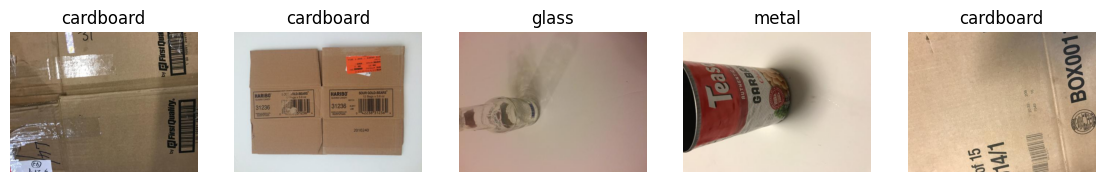

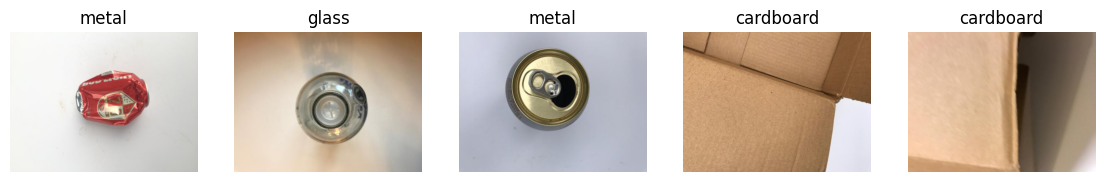

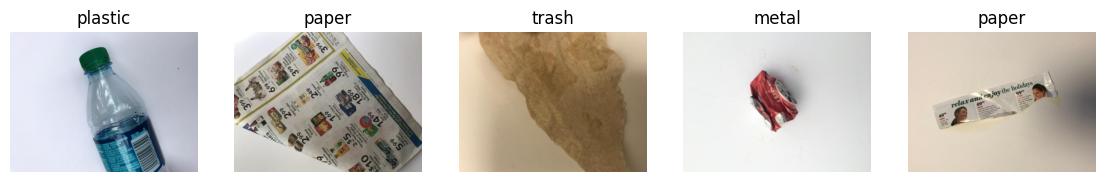

In [ ]:
plot_random_images(df, 5)
plot_random_images(df, 5)
plot_random_images(df, 5)

##### Sources
Official Documentation for xlabel, ylabel, xticks, yticks: 
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html

For loop iteration of subplots using ax.patches approach:
- https://stackoverflow.com/questions/67753157/ax-patches-for-accessing-the-subplots-in-python 
- The source above was used to grasp the concept for which function to use and how the function works
- The only code taken here is the function used so the contribution would be the usage of different argument values

In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    # Updated colors
    c = ['#66CD00', '#FF0000', '#FFA500', '#FFFF00', '#00BFFF', '#8A2BE2']
    ax = df_final[col].value_counts().plot(kind='bar', color=c)

    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1, 2, 2)

    # Updated explode values
    explode = [0.05] * 6
    df_final[col].value_counts().plot.pie(explode=explode, autopct='%1.2f%%', shadow=True, colors=c,
                                          textprops={'fontsize': 15, 'color': 'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.show()

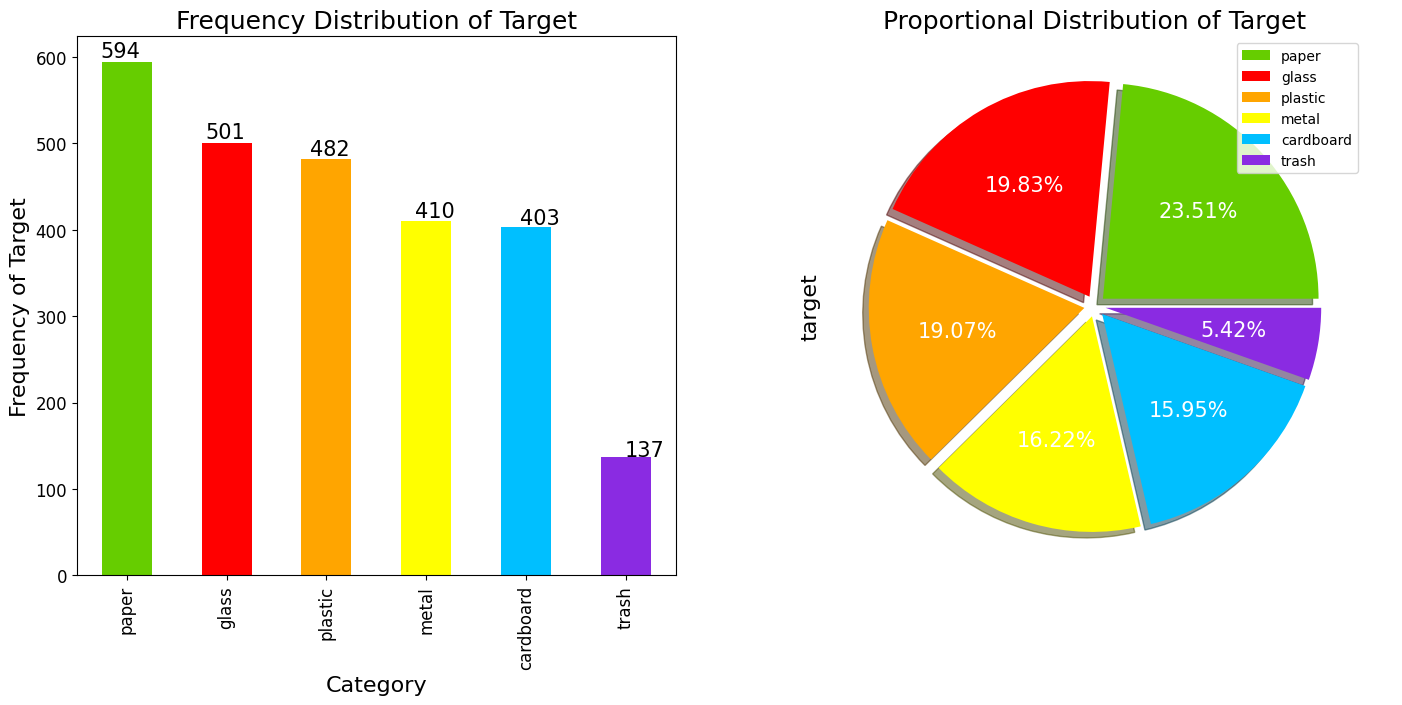

In [ ]:
target_distribution(df, 'Class')

##### Sources:
- Getting number of GPUs available: https://stackoverflow.com/questions/38559755/how-to-get-current-available-gpus-in-tensorflow
- Know which GPU is being used: https://stackoverflow.com/questions/64863439/tensorflow-with-gpu-how-to-see-tensorflow-is-using-the-gpu

- Sources above were used to know which function is used for this usecase (gpu_device_name()) 
- Own contribution: addition of if-else blocks to capture the different scenarios

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import tensorflow as tf

print(tf.__version__)
if 'COLAB_TPU_ADDR' in os.environ:
    print('Connected to TPU')
elif tf.test.gpu_device_name() is not '':
    print('Connected to GPU ' + tf.test.gpu_device_name())
else:
    print('Neither connected to a TPU nor a GPU')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

2.14.0
Connected to GPU /device:GPU:0
Sun Nov  5 15:34:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    41W / 300W |  15504MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                  

##### Sources: 
- Official documentation of label encoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- Using label encoder in different columns: https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
- Tutorial of how the function works: https://stackoverflow.com/questions/64318350/how-does-labelencoder-encode-values

- The above sources were only used to understand how the function works

In [ ]:
from sklearn.preprocessing import LabelEncoder

# convert the categorical values to numeric values
labelEncoder = LabelEncoder()
df['Class'] = labelEncoder.fit_transform(df['Class'])

In [ ]:
labelEncoder.classes_

array(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],
      dtype=object)

In [ ]:
from tqdm.auto import tqdm

height = 224
width = 224
channel = 3

def get_X_Y(df):
    images, labels = [], []
    # Iterate over image paths
    for img_path, target in tqdm(zip(df['image_path'], df['Class']), total=len(df)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (height, width))  # Unify shape of all the images.

        images.append(img)
        labels.append(target)

    # Convert images and labels to numpy arrays
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [ ]:
# Get X and y arrays using the get_X_Y function
X, y = get_X_Y(df)

  0%|          | 0/2527 [00:00<?, ?it/s]

In [ ]:
X.shape, y.shape

((2527, 224, 224, 3), (2527,))

In [ ]:
# Normalise all the images
def normalize_images(images):
  # convert into float32
  images = images.astype('float32')
  images /= 255.0
  return images

In [ ]:
# Normalize the images in X
X_norm = normalize_images(X)
print("done.")

done.


In [ ]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

#### Sources
- Official documentation of train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Concept Clarification / Used for inspiration: https://stackoverflow.com/questions/31521170/scikit-learn-train-test-split-with-indices
- Concept Clarification / Used for inspiration: https://stackoverflow.com/questions/57754373/train-test-split-method-of-scikit-learn

- The above sources were only used to understand how the function works
- Different test size and random state arguments were used to fit our own situation

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and remaining (validation + test) sets
# 80% for training, 10% for testing and validation
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=0, stratify=y)

# Splitting the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=0, stratify=y_test)

# Printing the shapes of the datasets
print("Training Data:", X_train.shape)
print("Validation Data:", X_val.shape)
print("Test Data:", X_test.shape)


Training Data: (2021, 224, 224, 3)
Validation Data: (253, 224, 224, 3)
Test Data: (253, 224, 224, 3)


In [ ]:
print("Training Splition Data")
print(pd.Series(y_train).astype(int).value_counts())
print()
print("Testing Splition Data")
print(pd.Series(y_test).astype(int).value_counts())
print()
print("Validation Splition Data")
print(pd.Series(y_val).astype(int).value_counts())

Training Splition Data
3    475
1    401
4    385
2    328
0    322
5    110
dtype: int64

Testing Splition Data
3    60
1    50
4    48
0    41
2    41
5    13
dtype: int64

Validation Splition Data
3    59
1    50
4    49
2    41
0    40
5    14
dtype: int64


In [ ]:
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

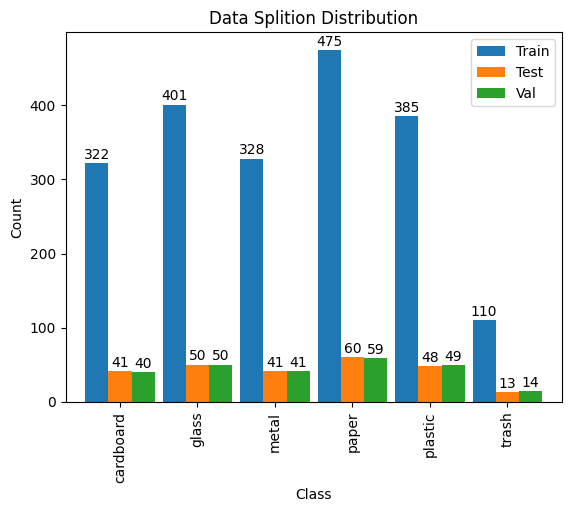

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create Pandas series objects and get the value counts
y_train_series = pd.Series(y_train).astype(int)
y_test_series = pd.Series(y_test).astype(int)
y_val_series = pd.Series(y_val).astype(int)

train_value_counts = y_train_series.map({0:"cardboard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"}).value_counts()
test_value_counts = y_test_series.map({0:"cardboard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"}).value_counts()
val_value_counts = y_val_series.map({0:"cardboard", 1:"glass", 2:"metal", 3:"paper", 4:"plastic", 5:"trash"}).value_counts()


# Create a Pandas DataFrame from the value counts
df = pd.DataFrame({'Train': train_value_counts, 'Test': test_value_counts,
                   'Val':val_value_counts})
# Create a grouped bar plot
ax = df.plot.bar(width=0.9)

# Loop over the bars and add the count number
for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=1)

# Set the labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Data Splition Distribution')

plt.savefig("train_test_val.png", bbox_inches='tight')
# Show the plot
plt.show()


##### Sources 
- Official documentation of to_categorical function: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
- Tutorial how to use to_categorical: https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/

- The above sources were only used to understand which function captures the essence of what we're trying to do along with how the function works

In [ ]:
from keras.utils import to_categorical

# Perform one-hot encoding on labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

In [ ]:
# Get the list of Classes from a label encoder
Classes = list(labelEncoder.classes_)
Classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

## **Model Building**

##### Sources
- Official Documentation of ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- Tutorial how to use ImageDataGenerator: https://stackoverflow.com/questions/70080062/how-to-correctly-use-imagedatagenerator-in-keras

- The above sources were only used to understand how the function works and what each parameter in the function meant
- Different values were used to fit our own situation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
)

##### Sources 
- Tutorial for DenseNet201: https://www.kaggle.com/code/ris320/densenet201-training-with-tensorflow
- Official DenseNet201 Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/applications/densenet/DenseNet201
- Tutorial for VGG16: https://builtin.com/machine-learning/vgg16
- Official Documentation of Keras Sequential Method: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- Tutorial for Sequential method and alternatives: https://pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/
- The above sources were only used to understand how the pre-trained models work and how they can be used for transfer learning. No code was directly copied and pasted

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNet

In [ ]:
def LoadPretrainedModel(MODEL):
  # Load the pre-trained model
  pretrained_model = MODEL(weights='imagenet', include_top=False, input_shape=(height, width, channel))

  # Freeze the pre-trained layers to prevent their weights from being updated during training
  for layer in pretrained_model.layers:
      layer.trainable = False

  # Create a new model by adding your custom layers on top of the model
  model = tf.keras.Sequential([
      pretrained_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(len(Classes), activation='softmax')
  ])

  # Compile and summarize the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

### **VGG16**

In [ ]:
model_vgg16 = LoadPretrainedModel(VGG16)
print(model_vgg16.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_7  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                      

In [ ]:
def TrainModel(model, epochs, batch_size, early_stopping, verbose):
  # Train the model with early stopping on train data and validate on test data
  history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),epochs=epochs,verbose=verbose,validation_data=(X_val, y_val_one_hot), callbacks=[early_stopping])
  return history

In [ ]:
EPOCHS = 30
BATCH_SIZE = 64

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = TrainModel(model_vgg16, EPOCHS, BATCH_SIZE, early_stopping, verbose = 1)

Epoch 1/30
32/32 [==============================] - 23s 677ms/step - loss: 1.6327 - accuracy: 0.3246 - val_loss: 1.3972 - val_accuracy: 0.4466
Epoch 2/30
32/32 [==============================] - 21s 653ms/step - loss: 1.3288 - accuracy: 0.4617 - val_loss: 1.1748 - val_accuracy: 0.5257
Epoch 3/30
32/32 [==============================] - 22s 670ms/step - loss: 1.1538 - accuracy: 0.5413 - val_loss: 1.0377 - val_accuracy: 0.5692
Epoch 4/30
32/32 [==============================] - 22s 677ms/step - loss: 1.0353 - accuracy: 0.5987 - val_loss: 0.9057 - val_accuracy: 0.6364
Epoch 5/30
32/32 [==============================] - 21s 669ms/step - loss: 0.9693 - accuracy: 0.6314 - val_loss: 0.8590 - val_accuracy: 0.6561
Epoch 6/30
32/32 [==============================] - 22s 689ms/step - loss: 0.8863 - accuracy: 0.6616 - val_loss: 0.8396 - val_accuracy: 0.6719
Epoch 7/30
32/32 [==============================] - 22s 676ms/step - loss: 0.8300 - accuracy: 0.7011 - val_loss: 0.7612 - val_accuracy: 0.7273

In [ ]:
def plotGraphs(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs_range=range(len(history.history['loss']))

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, training_loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

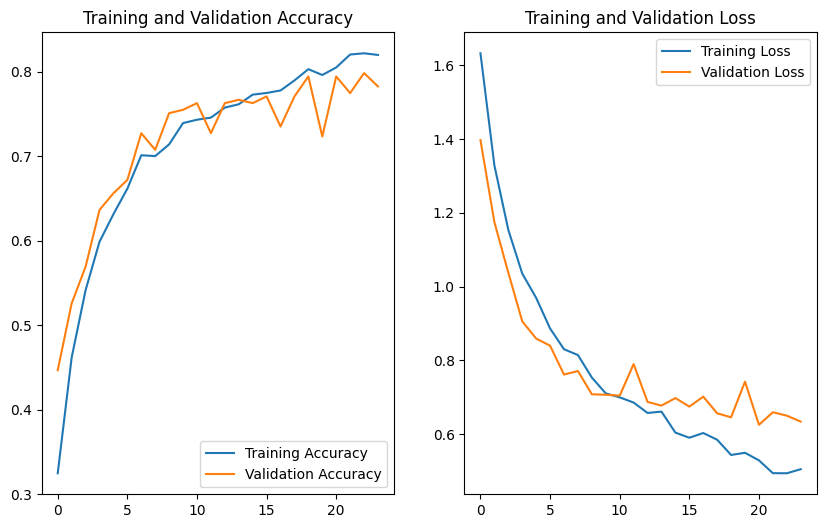

In [ ]:
plotGraphs(history)

##### Sources:
- Tutorial how predict function works: https://www.askpython.com/python/examples/python-predict-function
- Official Documentation of accuracy_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- Tutorial on computing accuracy: https://stackoverflow.com/questions/37665680/how-does-sklearn-compute-the-accuracy-score-step-by-step
- Tutorial on computing accuracy part 2: https://stackoverflow.com/questions/73936377/do-accuracy-score-from-scikit-learn-compute-overall-accuracy-or-mean-accuracy

- The above sources were only used to understand which function needs to be used for predicting with test data
and how the function works along with which arguments are acceptable. No code was directly copied and pasted

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def GetPredictionTestingData(model):
    # Perform predictions on the validation set
    y_pred_test = model.predict(X_test)
    y_pred_test = np.argmax(np.round(y_pred_test), axis=1)

    # Perform predictions on the training set
    y_pred_train = model.predict(X_train)
    y_pred_train = np.argmax(np.round(y_pred_train), axis=1)

    # Calculate and print training accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Training Accuracy:", accuracy_train)

    # Calculate and print testing accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Testing Accuracy:", accuracy_test)

    return y_pred_test, y_pred_train

In [ ]:
y_pred, y_pred_train = GetPredictionTestingData(model_vgg16)

64/64 [==============================] - 2s 39ms/step
Training Accuracy: 0.8174171202375062
Testing Accuracy: 0.7154150197628458


##### Sources
- Official documentation for confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
- The above sources were only used to understand which function can display confusion matrices along with how the function works

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def results(model_name, y_pred, y_test, y_train,y_pred_train):
    target_names = ["{}".format(Classes[i]) for i in range(len(Classes))] # Define target names for classification report
    accuracy = round(accuracy_score(y_pred, y_test)*100,4)
    train_accuracy = round(accuracy_score(y_pred_train, y_train)*100,4)

    precision = round(precision_score(y_pred, y_test, average='macro')*100,4)
    recall = round(recall_score(y_pred, y_test, average='macro')*100,4)
    f1_scr = round(f1_score(y_pred, y_test, average='macro')*100,4)


    print("\nTraining Accuracy: {}%".format(train_accuracy))
    print("Testing Accuracy: {}%".format(accuracy))

    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print()
    print("Classification Report:")
    print(classification_report(y_pred, y_test, target_names=target_names))
    print()
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(7,5))
    ConfusionMatrixDisplay.from_predictions(y_pred, y_test,
                                            ax=ax,
                                            display_labels=target_names,
                                            xticks_rotation='vertical')
    plt.show()

    return {
        'Model':model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr
    }

In [ ]:
def GetModelResultsInDataFrame(res):
  # Convert the dictionary to a DataFrame
  return pd.DataFrame.from_dict([res]).set_index('Model')


Training Accuracy: 81.7417%
Testing Accuracy: 71.5415%
Precision: 66.826%
Recall: 72.8937%
F1-Score: 67.3059%

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.85      0.52      0.65        67
       glass       0.76      0.75      0.75        51
       metal       0.80      0.79      0.80        42
       paper       0.78      0.80      0.79        59
     plastic       0.50      0.86      0.63        28
       trash       0.31      0.67      0.42         6

    accuracy                           0.72       253
   macro avg       0.67      0.73      0.67       253
weighted avg       0.76      0.72      0.72       253


Confusion Matrix:


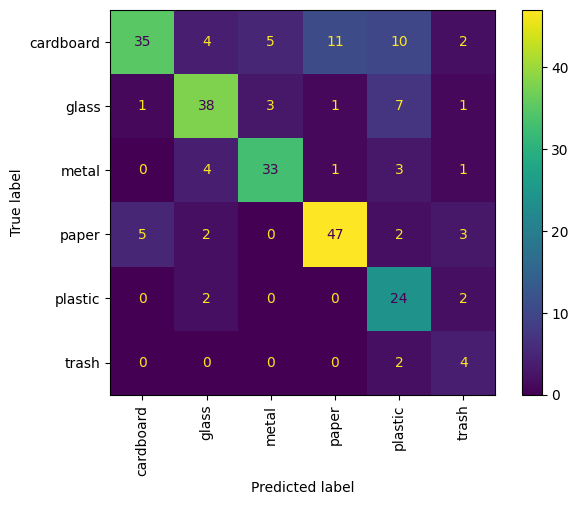

,Training Accuracy,Testing Accuracy,Precision,Recall,F1
Model,,,,,
VGG16,81.7417,71.5415,66.826,72.8937,67.3059


In [ ]:
vgg16_res = GetModelResultsInDataFrame(results("VGG16", y_pred, y_test, y_train, y_pred_train))
vgg16_res

### **DenseNet201**

In [ ]:
model_densenet201 = LoadPretrainedModel(DenseNet201)
print(model_densenet201.summary())
history = TrainModel(model_densenet201, EPOCHS, BATCH_SIZE, early_stopping, verbose =1 )

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_8  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_32 (Dense)            (None, 256)               491776    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                      

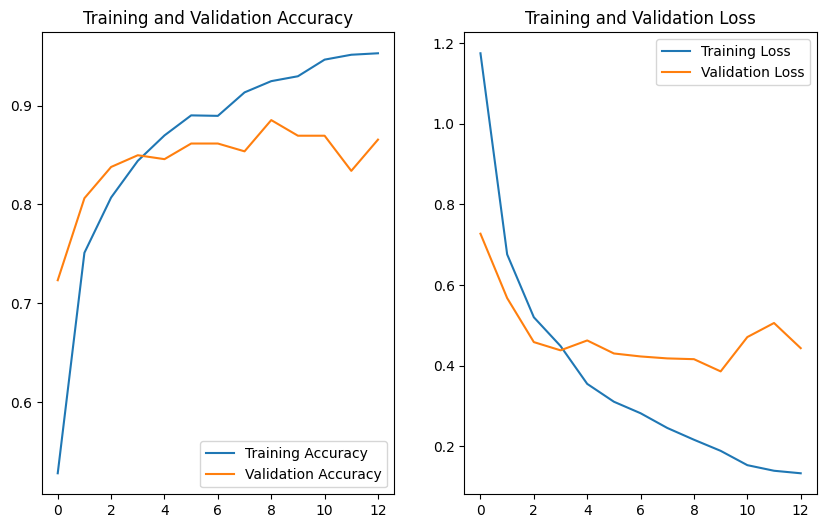

64/64 [==============================] - 4s 57ms/step
Training Accuracy: 0.9698169223156853
Testing Accuracy: 0.8616600790513834


In [ ]:
plotGraphs(history)
y_pred, y_pred_train = GetPredictionTestingData(model_densenet201)


Training Accuracy: 96.9817%
Testing Accuracy: 86.166%
Precision: 81.9574%
Recall: 84.7111%
F1-Score: 82.8838%

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.93      0.81      0.86        47
       glass       0.88      0.85      0.86        52
       metal       0.78      0.82      0.80        39
       paper       0.92      0.92      0.92        60
     plastic       0.88      0.91      0.89        46
       trash       0.54      0.78      0.64         9

    accuracy                           0.86       253
   macro avg       0.82      0.85      0.83       253
weighted avg       0.87      0.86      0.86       253


Confusion Matrix:


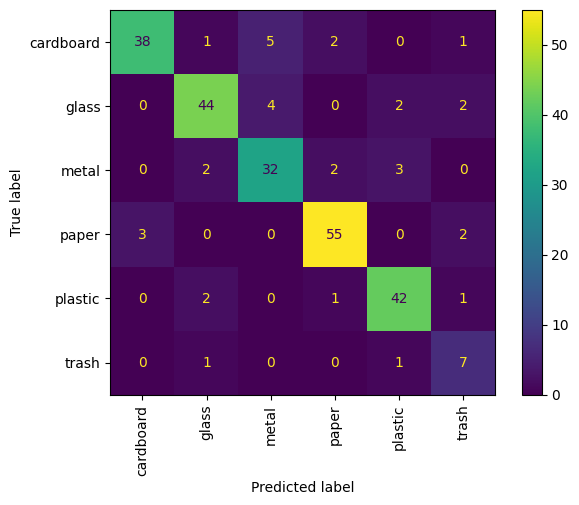

,Training Accuracy,Testing Accuracy,Precision,Recall,F1
Model,,,,,
DenseNet201,96.9817,86.166,81.9574,84.7111,82.8838


In [ ]:
densenet201_res = GetModelResultsInDataFrame(results("DenseNet201", y_pred, y_test, y_train, y_pred_train))
densenet201_res

### **Models Evaluation**

In [ ]:
df_all_models = pd.concat([vgg16_res, densenet201_res])
models_pd_ = df_all_models.reset_index()
models_pd_

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1
0,VGG16,81.7417,71.5415,66.8260,72.8937,67.3059
1,DenseNet201,96.9817,86.1660,81.9574,84.7111,82.8838


* DenseNet201 model is better lets save this model.

### **Save & Load Model**

In [ ]:
# serialize model to JSON
from keras.models import model_from_json
model_json = model_densenet201.to_json()
with open("/content/drive/MyDrive/GarbageModel/garbage_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_densenet201.save_weights("/content/drive/MyDrive/GarbageModel/garbage_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json

In [ ]:
# load json and create model
json_file = open('/content/drive/MyDrive/GarbageModel/garbage_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/GarbageModel/garbage_model.h5")
print("Loaded model from disk")

Loaded model from disk


### **Image Prediction**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def image_prediction(path, model):
    mask_label = {0: "cardboard", 1: "glass", 2: "metal", 3: "paper", 4: "plastic", 5: "trash"}
    sample_mask_img = cv2.imread(path)
    img = cv2.resize(sample_mask_img, (224, 224))
    sample_mask_img = np.reshape(img, [1, 224, 224, 3])
    sample_mask_img = sample_mask_img / 255.0
    prediction = model.predict(sample_mask_img, verbose=0)
    label = np.argmax(prediction)
    probability = prediction[0][label]
    plt.imshow(img)
    plt.title(f"Predicted: {mask_label[label]}\nProbability: {probability:.2f}", fontsize=15)
    plt.show()


In [ ]:
def image_prediction(path, model):
    mask_label = {0: "cardboard", 1: "glass", 2: "metal", 3: "paper", 4: "plastic", 5: "trash"}
    sample_mask_img = cv2.imread(path)
    img = cv2.resize(sample_mask_img, (224, 224))
    sample_mask_img = np.reshape(img, [1, 224, 224, 3])
    sample_mask_img = sample_mask_img / 255.0
    prediction = model.predict(sample_mask_img, verbose=0)
    labels = [mask_label[i] for i in range(len(mask_label))]
    probabilities = prediction[0]
    label = np.argmax(prediction)
    probability = probabilities[label]
    plt.imshow(img)
    title = f"Predicted: {mask_label[label]}\n"
    title += "Class Probabilities:\n"
    for i in range(len(mask_label)):
      title += f"{mask_label[i]}: {probabilities[i]:.2f} "
      if i%3==1:
        title += f"\n"
    plt.title(title, fontsize=12)
    plt.show()

    text = ''
    if mask_label[label]=='trash':
      text = 'Non-recylable'
    else:
      text = 'Recylable'
    return {"Image":path, "Prediction":mask_label[label], 'Probability':probability, 'Comments':text}

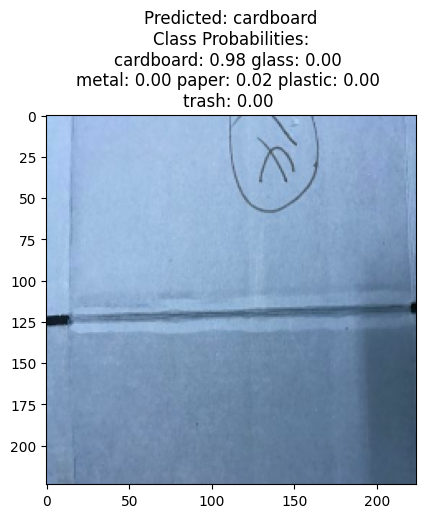

{'Image': '/content/garbage classification/Garbage classification/cardboard/cardboard1.jpg',
 'Prediction': 'cardboard',
 'Probability': 0.9826766,
 'Comments': 'Recylable'}

In [ ]:
image_prediction("/content/garbage classification/Garbage classification/cardboard/cardboard1.jpg", loaded_model)

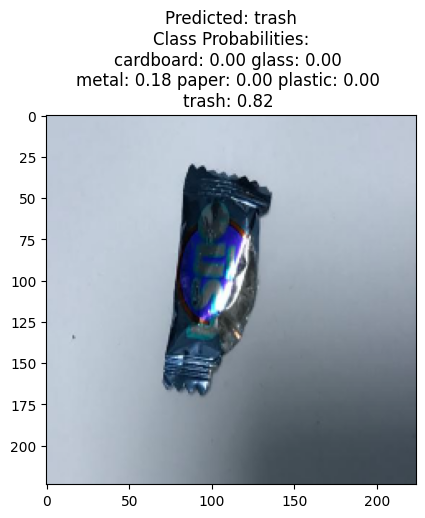

{'Image': '/content/garbage classification/Garbage classification/trash/trash10.jpg',
 'Prediction': 'trash',
 'Probability': 0.81848687,
 'Comments': 'Non-recylable'}

In [ ]:
image_prediction("/content/garbage classification/Garbage classification/trash/trash10.jpg", loaded_model)

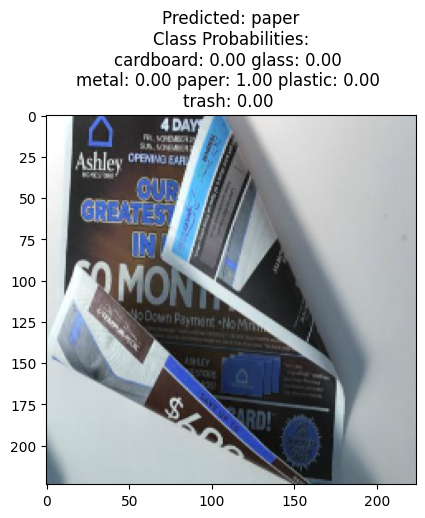

{'Image': '/content/garbage classification/Garbage classification/paper/paper165.jpg',
 'Prediction': 'paper',
 'Probability': 0.99979407,
 'Comments': 'Recylable'}

In [ ]:
image_prediction("/content/garbage classification/Garbage classification/paper/paper165.jpg", loaded_model)